# Actividad 3
Francisco Javier Sanchez Panduro
A01639832

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('dow_jones_index.data', index_col=[0])

In [3]:
raw_data.head()

,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
quarter,,,,,,,,,,,,,,,
1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [4]:
clean_df = raw_data[['date', 'high', 'low', 'volume', 'percent_change_price']].copy()

In [5]:
formatted_date = pd.to_datetime(clean_df['date'])
clean_df['date'] = formatted_date

In [6]:
clean_df.head()

,date,high,low,volume,percent_change_price
quarter,,,,,
1,2011-01-07,$16.72,$15.78,239655616,3.79267
1,2011-01-14,$16.71,$15.64,242963398,-4.42849
1,2011-01-21,$16.38,$15.60,138428495,-2.47066
1,2011-01-28,$16.63,$15.82,151379173,1.63831
1,2011-02-04,$17.39,$16.18,154387761,5.93325


In [7]:
clean_df = clean_df.set_index(['date'])

In [8]:
clean_df.head()

,high,low,volume,percent_change_price
date,,,,
2011-01-07,$16.72,$15.78,239655616,3.79267
2011-01-14,$16.71,$15.64,242963398,-4.42849
2011-01-21,$16.38,$15.60,138428495,-2.47066
2011-01-28,$16.63,$15.82,151379173,1.63831
2011-02-04,$17.39,$16.18,154387761,5.93325


In [9]:
high_list = []
for i in clean_df['high']:
    high_list.append(i[1:])

In [10]:
low_list = []
for i in clean_df['low']:
    low_list.append(i[1:])

In [11]:
df = clean_df

In [12]:
df['high'] = high_list

In [13]:
df['low'] = low_list

In [14]:
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])

In [15]:
df.sort_index(ascending = True)

,high,low,volume,percent_change_price
date,,,,
2011-01-07,16.72,15.78,239655616,3.792670
2011-01-07,30.10,28.66,157834347,-2.796500
2011-01-07,14.69,13.80,1453438639,2.888090
2011-01-07,65.08,64.00,52323352,0.170834
2011-01-07,18.38,17.62,386804789,3.615820
...,...,...,...,...
2011-06-24,15.64,14.92,429730443,-0.066934
2011-06-24,50.15,48.15,34877916,-0.020682
2011-06-24,102.50,96.05,43722864,3.648050


In [16]:
daily_mean = df.groupby(df.index).mean()

In [17]:
print(daily_mean.head())

                 high        low        volume  percent_change_price
date                                                                
2011-01-07  52.394333  50.535000  1.641992e+08              0.533190
2011-01-14  52.315333  50.572000  1.090246e+08              1.322282
2011-01-21  52.934333  51.229333  1.223585e+08              0.156960
2011-01-28  53.713667  51.400333  1.507353e+08             -0.597219
2011-02-04  53.592333  51.746333  1.199585e+08              2.099038


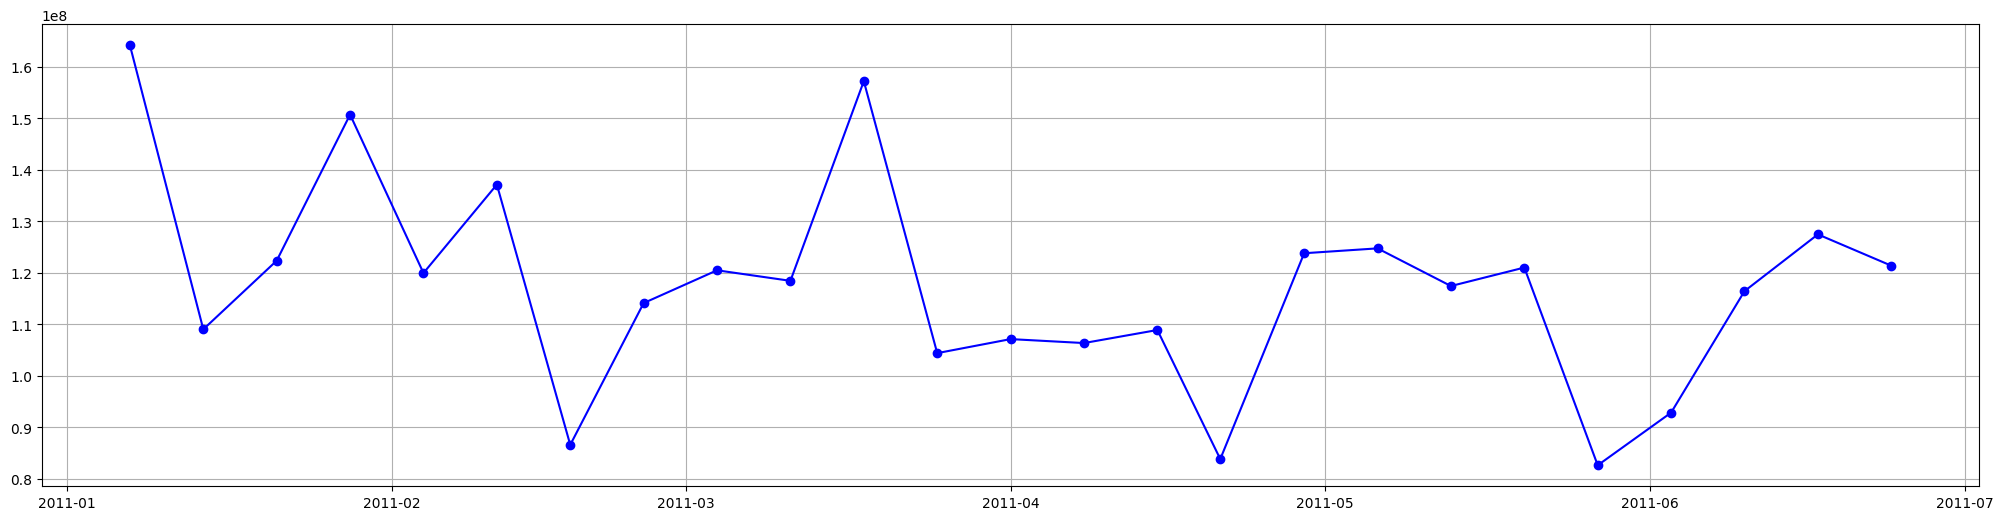

In [18]:
fig = plt.figure(figsize=(25, 6))

plt.plot(daily_mean.index, daily_mean['volume'], 'bo-')
plt.grid()
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller (df["volume"], maxlag = 1)
print("T-test (Test Statistic): ", adf[0], "In")
print("P-value: ", adf[1], "\n")
print("Valores criticos (Critical Value): ", adf[4])

T-test (Test Statistic):  -7.579645819460241 In
P-value:  2.7031912220007707e-11 

Valores criticos (Critical Value):  {'1%': -3.43912257105195, '5%': -2.8654117005229844, '10%': -2.568831705010152}
